<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Data-Exploration-&amp;-Cleaning" data-toc-modified-id="Data-Exploration-&amp;-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration &amp; Cleaning</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-total-customers,-total-kwh-&amp;-average-kwh-by-years-and-customer-class" data-toc-modified-id="Distribution-of-total-customers,-total-kwh-&amp;-average-kwh-by-years-and-customer-class-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distribution of total customers, total kwh &amp; average kwh by years and customer class</a></span></li><li><span><a href="#Monthly-and-Yearly-Trends-Analysis" data-toc-modified-id="Monthly-and-Yearly-Trends-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Monthly and Yearly Trends Analysis</a></span></li></ul></li><li><span><a href="#Testing-Hypotheses" data-toc-modified-id="Testing-Hypotheses-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing Hypotheses</a></span><ul class="toc-item"><li><span><a href="#Seasonality-Hypothesis-Test" data-toc-modified-id="Seasonality-Hypothesis-Test-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Seasonality Hypothesis Test</a></span><ul class="toc-item"><li><span><a href="#T-test-of-group-means" data-toc-modified-id="T-test-of-group-means-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>T-test of group means</a></span></li><li><span><a href="#Permutation-test" data-toc-modified-id="Permutation-test-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Permutation test</a></span></li></ul></li></ul></li></ul></div>

# Load Data

In [6]:
import pandas as pd
import os 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# Combining all the years together 
# data was downloaded from Pacific Gas and Electric Company website
# https://pge-energydatarequest.com/public_datasets/download?type=electric&file=PGE_2021_Q4_ElectricUsageByZip.zip

# Create an empty list to store the dataframes
current_dir = 'Raw Data'
df_list = []

# Loop through each CSV file in the directory
for filename in os.listdir(current_dir):
    if filename.endswith('.csv'):
        # Read the CSV file and append it to the list of dataframes
        file_path = os.path.join(current_dir, filename)
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.lower()
        #df['Quarter']=filename[9:11]
        df_list.append(df)

# Concatenate all dataframes in the list into a single dataframe
df_years = pd.concat(df_list, ignore_index=True)

# Data Exploration & Cleaning

In [8]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
0,93202,1,2013,Elec- Agricultural,Y,0,0,NaN
1,93202,2,2013,Elec- Agricultural,Y,0,0,NaN
2,93202,3,2013,Elec- Agricultural,Y,0,0,NaN
3,93203,1,2013,Elec- Agricultural,Y,0,0,NaN
4,93203,2,2013,Elec- Agricultural,Y,0,0,NaN
...,...,...,...,...,...,...,...,...
304596,96137,11,2021,Elec- Residential,N,"2,790","973,018",349
304597,96137,12,2021,Elec- Residential,N,"2,788","1,099,806",394
304598,96162,10,2021,Elec- Residential,Y,0,0,NaN
304599,96162,11,2021,Elec- Residential,Y,0,0,NaN


In [9]:
df_years.columns

Index(['zipcode', 'month', 'year', 'customerclass', 'combined',
       'totalcustomers', 'totalkwh', 'averagekwh'],
      dtype='object')

In [10]:
df_years.info() 
# some columns like total customers are not integer or float types we'll need to fix this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304601 entries, 0 to 304600
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   zipcode         304601 non-null  int64 
 1   month           304601 non-null  int64 
 2   year            304601 non-null  int64 
 3   customerclass   304601 non-null  object
 4   combined        304601 non-null  object
 5   totalcustomers  304601 non-null  object
 6   totalkwh        304601 non-null  object
 7   averagekwh      139063 non-null  object
dtypes: int64(3), object(5)
memory usage: 18.6+ MB


In [11]:
df_years['totalcustomers']=df_years['totalcustomers'].str.replace(',','')
df_years['totalkwh']=df_years['totalkwh'].str.replace(',','')
df_years['averagekwh']=df_years['averagekwh'].str.replace(',','')

In [12]:
df_years['totalcustomers']=df_years['totalcustomers'].astype(int)
df_years['totalkwh']=df_years['totalkwh'].astype(float)
df_years['averagekwh']=df_years['averagekwh'].astype(float)

In [13]:
df_years.describe()

,zipcode,month,year,totalcustomers,totalkwh,averagekwh
count,304601.000000,304601.000000,304601.000000,304601.000000,3.046010e+05,1.390630e+05
mean,94817.370557,6.486482,2016.757896,1848.833261,2.490787e+06,1.030951e+04
std,870.311871,3.476309,2.615935,4293.595731,1.390591e+07,9.644375e+04
min,92356.000000,1.000000,2013.000000,0.000000,0.000000e+00,1.100000e+01
25%,94041.000000,3.000000,2014.000000,0.000000,0.000000e+00,5.080000e+02
50%,95039.000000,6.000000,2017.000000,0.000000,0.000000e+00,7.390000e+02
75%,95528.000000,10.000000,2019.000000,951.000000,2.030188e+06,4.203000e+03
max,96162.000000,12.000000,2021.000000,110585.000000,1.250439e+09,2.371711e+06


In [14]:
df_years['combined'].value_counts(normalize=True)*100 # 65% of our data belongs to combines zip codes

Y    65.79591
N    34.20409
Name: combined, dtype: float64

In [15]:
df_years.duplicated().any() #determine duplicates

True

In [16]:
df_years.duplicated().sum() # we have 14863 duplicates 

14863

In [17]:
df_years[df_years.duplicated(keep=False)].sort_values(by=['zipcode','month','year']) # lets see these duplicates ourselves

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
32096,93101,1,2014,Elec- Commercial,Y,0,0.0,NaN
35470,93101,1,2014,Elec- Residential,Y,0,0.0,NaN
53393,93101,1,2014,Elec- Commercial,Y,0,0.0,NaN
53394,93101,1,2014,Elec- Residential,Y,0,0.0,NaN
32097,93101,2,2014,Elec- Commercial,Y,0,0.0,NaN
...,...,...,...,...,...,...,...,...
50832,96161,11,2013,Elec- Residential,Y,0,0.0,NaN
26877,96161,12,2013,Elec- Commercial,Y,0,0.0,NaN
30358,96161,12,2013,Elec- Residential,Y,0,0.0,NaN
53391,96161,12,2013,Elec- Commercial,Y,0,0.0,NaN


In [18]:
df_years=df_years.drop_duplicates()

In [19]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
0,93202,1,2013,Elec- Agricultural,Y,0,0.0,NaN
1,93202,2,2013,Elec- Agricultural,Y,0,0.0,NaN
2,93202,3,2013,Elec- Agricultural,Y,0,0.0,NaN
3,93203,1,2013,Elec- Agricultural,Y,0,0.0,NaN
4,93203,2,2013,Elec- Agricultural,Y,0,0.0,NaN
...,...,...,...,...,...,...,...,...
304596,96137,11,2021,Elec- Residential,N,2790,973018.0,349.0
304597,96137,12,2021,Elec- Residential,N,2788,1099806.0,394.0
304598,96162,10,2021,Elec- Residential,Y,0,0.0,NaN
304599,96162,11,2021,Elec- Residential,Y,0,0.0,NaN


In [20]:
df_years['customerclass'].value_counts() # we have 4 classess of customers

Elec- Residential     98990
Elec- Commercial      92815
Elec- Agricultural    65264
Elec- Industrial      32669
Name: customerclass, dtype: int64

In [21]:
#lets randomly check data consistency 
df_years[(df_years['zipcode']==94538) & (df_years['year']==2014)]['month'].value_counts()
# we see that in 2014 we have 6 observations per month which is not what we expected 
# since we only have 4 types of customers

1     6
2     6
3     6
4     6
5     6
6     6
7     4
8     4
9     4
10    4
11    4
12    4
Name: month, dtype: int64

In [22]:
#lets look closer
df_years[(df_years['zipcode']==94538) & (df_years['year']==2014)].sort_values(by=['customerclass','combined','month'])
# we see that for some zipcodes some months are repeated but with different number of total customers
# since we don't expect one zipcode to appear in the data several times per month 
# we should drop these duplicates 

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
30951,94538,1,2014,Elec- Agricultural,Y,0,0.0,NaN
30952,94538,2,2014,Elec- Agricultural,Y,0,0.0,NaN
30953,94538,3,2014,Elec- Agricultural,Y,0,0.0,NaN
38635,94538,4,2014,Elec- Agricultural,Y,0,0.0,NaN
38636,94538,5,2014,Elec- Agricultural,Y,0,0.0,NaN
38637,94538,6,2014,Elec- Agricultural,Y,0,0.0,NaN
69629,94538,7,2014,Elec- Agricultural,Y,0,0.0,NaN
72194,94538,8,2014,Elec- Agricultural,Y,0,0.0,NaN
74759,94538,9,2014,Elec- Agricultural,Y,0,0.0,NaN
77323,94538,10,2014,Elec- Agricultural,Y,0,0.0,NaN


In [23]:
df_years[df_years.duplicated(subset=['zipcode', 'combined','month','year','customerclass','totalcustomers'], keep=False)].sort_values(by=['zipcode','month','year'])
# these are our near duplicates

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
167005,93201,9,2017,Elec- Residential,N,303,215400.0,711.0
176600,93201,9,2017,Elec- Residential,N,303,215127.0,710.0
163569,93203,9,2017,Elec- Commercial,Y,459,5049264.0,11001.0
172020,93203,9,2017,Elec- Commercial,Y,459,5189677.0,11306.0
167011,93204,9,2017,Elec- Residential,N,2319,1546072.0,667.0
...,...,...,...,...,...,...,...,...
58509,96137,2,2014,Elec- Residential,N,2665,789811.0,296.0
38038,96137,3,2014,Elec- Residential,N,2667,817106.0,306.0
61069,96137,3,2014,Elec- Residential,N,2667,816794.0,306.0
30355,96137,12,2013,Elec- Residential,N,2658,1095961.0,412.0


In [24]:
len(df_years[df_years.duplicated(subset=['zipcode', 'combined','month','year','customerclass','totalcustomers'])])
# we have 1520 such near duplicates 


1520

In [25]:
df_years=df_years.drop_duplicates(subset=['zipcode', 'combined','month','year','customerclass','totalcustomers'], keep='first')
# lets keep the first occurence 
#later we can play with what happens if we keep the secon occurence
# or create a measure which keeps the average of totalkwh and averagekwh  across all occurences

In [26]:
len(df_years[(df_years['totalcustomers']==0) & (df_years['totalkwh']==0)& (df_years['averagekwh'].isnull())])
# We also have some lines with all 0s in total customers, total kilowatt per hour and 
# missing average kilo watt per hour 
# this may indicate zip codes where PGE does not have any customers / no coverage 
# Since these observations does not add any info except the zipcodes themselves we could drop them 

152392

In [27]:
mask=(df_years['totalcustomers']==0) & (df_years['totalkwh']==0) & (df_years['averagekwh'].isnull())
# filtering for these observations 

df_years=df_years[~mask] # excluding these observations from our dataset

In [28]:
len(df_years[df_years.duplicated(subset=['zipcode', 'combined','month','year','customerclass'])])
# lets check for other duplicates based on 'zipcode', 'combined','month','year','customerclass' only - we have 7777 of them

7777

In [29]:
df_years[df_years.duplicated(subset=['zipcode', 'combined','month','year','customerclass'],keep=False)].sort_values(by=['zipcode','month','year'])

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
35488,93203,1,2014,Elec- Residential,Y,4450,1972035.0,443.0
53407,93203,1,2014,Elec- Residential,Y,4449,1971727.0,443.0
35489,93203,2,2014,Elec- Residential,Y,4454,1580720.0,355.0
55967,93203,2,2014,Elec- Residential,Y,4453,1580431.0,355.0
30364,93203,3,2014,Elec- Agricultural,Y,132,7427724.0,56271.0
...,...,...,...,...,...,...,...,...
180018,96137,9,2017,Elec- Residential,N,2719,994598.0,366.0
30353,96137,10,2013,Elec- Residential,N,2654,926121.0,349.0
48279,96137,10,2013,Elec- Residential,N,2652,925766.0,349.0
30354,96137,11,2013,Elec- Residential,N,2655,901315.0,339.0


In [30]:
df_years=df_years.drop_duplicates(subset=['zipcode', 'combined','month','year','customerclass'], keep='first')
# lets drop these duplicates too and keep the firts occurence

In [31]:
df_years[(df_years['zipcode']==94538) & (df_years['year']==2014)].sort_values(by=['customerclass','combined','month'])
# now the data looks good 

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
32911,94538,1,2014,Elec- Commercial,N,2540,39954548.0,15730.0
32912,94538,2,2014,Elec- Commercial,N,2542,35842860.0,14100.0
32913,94538,3,2014,Elec- Commercial,N,2543,39660634.0,15596.0
40604,94538,4,2014,Elec- Commercial,N,2546,39196686.0,15395.0
40605,94538,5,2014,Elec- Commercial,N,2552,41278680.0,16175.0
40606,94538,6,2014,Elec- Commercial,N,2558,41212795.0,16111.0
69630,94538,7,2014,Elec- Commercial,N,2544,43554210.0,17120.0
72195,94538,8,2014,Elec- Commercial,N,2543,43274069.0,17017.0
74760,94538,9,2014,Elec- Commercial,N,2543,42139942.0,16571.0
77324,94538,10,2014,Elec- Commercial,N,2544,42213552.0,16593.0


In [32]:
df_years[(df_years['customerclass']=='Elec- Commercial') & (df_years['year']==2013)& (df_years['zipcode']==94538) ]['month'].value_counts()
# keep checking the data 
# this looks good as we have one observation for this zip code per commercial customer class 

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: month, dtype: int64

In [33]:
df_years[(df_years['customerclass']=='Elec- Residential') & (df_years['year']==2014)& (df_years['zipcode']==93203) ]['month'].value_counts()


1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: month, dtype: int64

In [34]:
df_years['customerclass'].value_counts() # we still have 4 classess of customers but not so many industrial and agricultural

Elec- Residential     84016
Elec- Commercial      35755
Elec- Agricultural     7521
Elec- Industrial        757
Name: customerclass, dtype: int64

In [35]:
df_years['customerclass'].unique()

array(['Elec- Agricultural', 'Elec- Commercial', 'Elec- Industrial',
       'Elec- Residential'], dtype=object)

In [36]:
df_years['zipcode'].nunique() # we have 827 zip codes here


827

In [37]:
ohe = pd.get_dummies(df_years['customerclass'], drop_first=True) # we create 3 dummies for further analysis

In [38]:
# Drops categorical variables from the df
#df_years = df_years.drop('customerclass', axis = 1) # lets not drop the initial avriable just for now

# Adds the newly created dummy variables instead
df_years = pd.concat([df_years, ohe], axis = 1) 

In [39]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh,Elec- Commercial,Elec- Industrial,Elec- Residential
10,93206,2,2013,Elec- Agricultural,Y,138,7249627.0,52534.0,0,0,0
11,93206,3,2013,Elec- Agricultural,Y,371,20354832.0,54865.0,0,0,0
16,93212,2,2013,Elec- Agricultural,Y,213,9971956.0,46817.0,0,0,0
28,93230,2,2013,Elec- Agricultural,Y,244,3942702.0,16159.0,0,0,0
46,93245,2,2013,Elec- Agricultural,N,334,1008626.0,3020.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
304593,96125,11,2021,Elec- Residential,N,441,99843.0,226.0,0,0,1
304594,96125,12,2021,Elec- Residential,N,441,103069.0,234.0,0,0,1
304595,96137,10,2021,Elec- Residential,N,2791,972348.0,348.0,0,0,1
304596,96137,11,2021,Elec- Residential,N,2790,973018.0,349.0,0,0,1


In [40]:
#determine if there is missing values
df_years.isna().any()

zipcode              False
month                False
year                 False
customerclass        False
combined             False
totalcustomers       False
totalkwh             False
averagekwh           False
Elec- Commercial     False
Elec- Industrial     False
Elec- Residential    False
dtype: bool

In [41]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh,Elec- Commercial,Elec- Industrial,Elec- Residential
10,93206,2,2013,Elec- Agricultural,Y,138,7249627.0,52534.0,0,0,0
11,93206,3,2013,Elec- Agricultural,Y,371,20354832.0,54865.0,0,0,0
16,93212,2,2013,Elec- Agricultural,Y,213,9971956.0,46817.0,0,0,0
28,93230,2,2013,Elec- Agricultural,Y,244,3942702.0,16159.0,0,0,0
46,93245,2,2013,Elec- Agricultural,N,334,1008626.0,3020.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
304593,96125,11,2021,Elec- Residential,N,441,99843.0,226.0,0,0,1
304594,96125,12,2021,Elec- Residential,N,441,103069.0,234.0,0,0,1
304595,96137,10,2021,Elec- Residential,N,2791,972348.0,348.0,0,0,1
304596,96137,11,2021,Elec- Residential,N,2790,973018.0,349.0,0,0,1


# Data Visualization 

## Distribution of total customers, total kwh & average kwh by years and customer class

In [42]:
def viz(customer_class, parameter, year=None):
    """
    Visualize the distribution of a parameter for a given customer class and year (optional).

    Parameters:
        customer_class (str): The customer class to visualize (e.g., 'Elec-Residential', 'Elec-Commercial').
        parameter (str): The parameter to plot the distribution for.
        year (int, optional): The year to plot the distribution for. If not specified, plots all years.

    Returns:
        None
    """  
    df=df_years[df_years['customerclass']==customer_class]
    unique_years = df['year'].unique()

    # Set the seaborn style
    sns.set(style='whitegrid')
    
    if year is not None:
        df=df[df['year']==year]
        unique_years=[year]

    # Create a separate histogram for each year
    for year in unique_years:
        # Filter the DataFrame for the current year
        df_year = df[df['year'] == year]

        # Create a FacetGrid for the current year
        g = sns.FacetGrid(df_year, row='customerclass', height=3, aspect=3,sharex=False, sharey=False)
        g.map(sns.histplot, parameter, bins=200)

        # Set axis labels
        g.set_axis_labels(parameter, 'Count')

        for ax in g.axes.flat: # setting x and y to intersect at 0
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0)
        g.set_axis_labels(parameter, 'Count')

        for ax, customer_class in zip(g.axes.flat, g.row_names):
        # Extract part of the customer_class starting from index 6
            customer_class = customer_class[6:]
      
        for ax, title in zip(g.axes.flat, g.row_names):
            ax.set_title(f"Distribution of {customer_class} {parameter}: {year} year")
        plt.show()

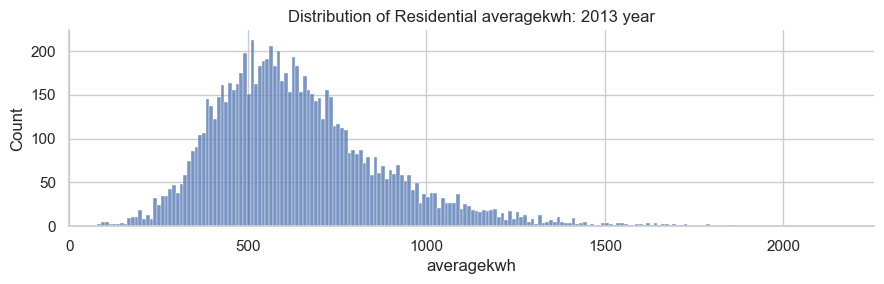

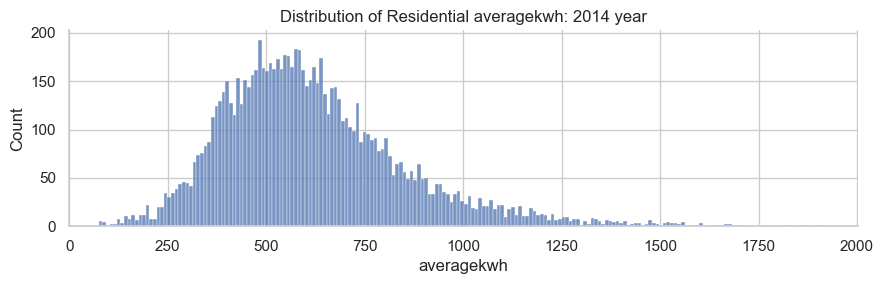

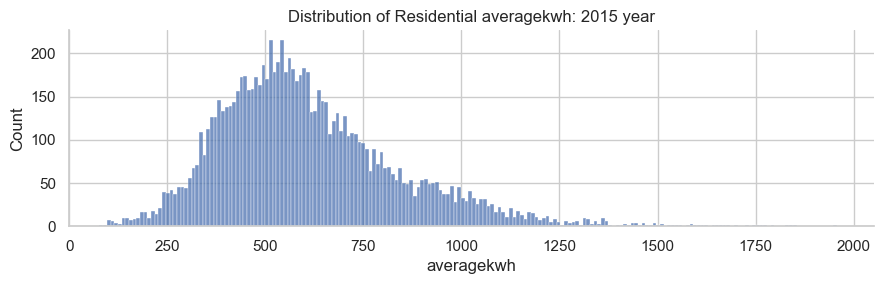

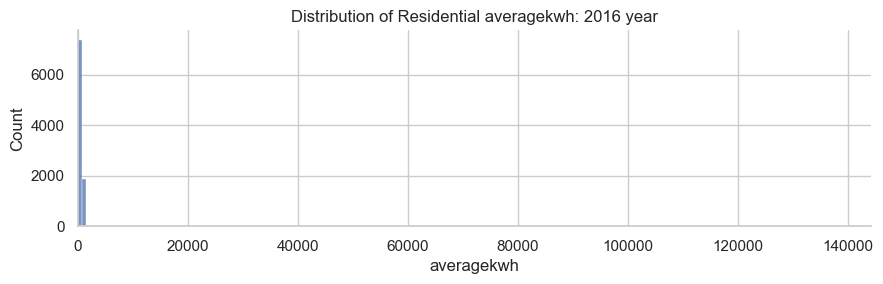

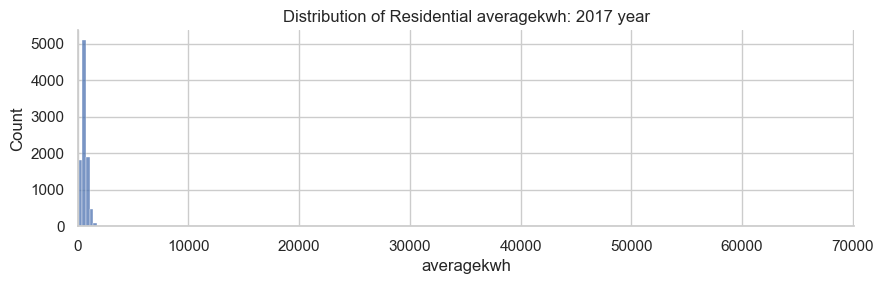

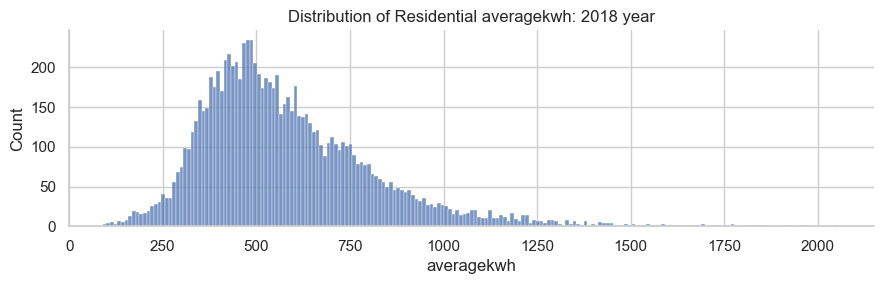

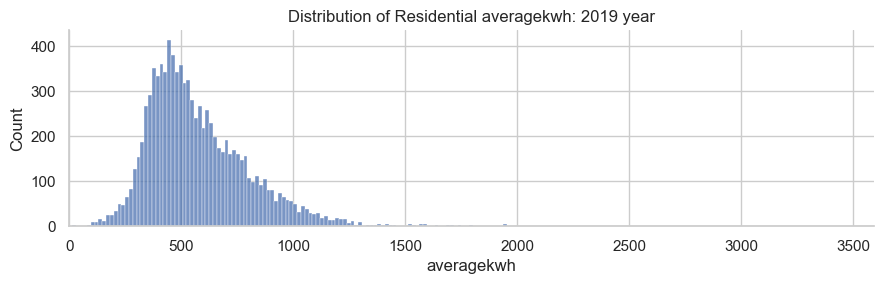

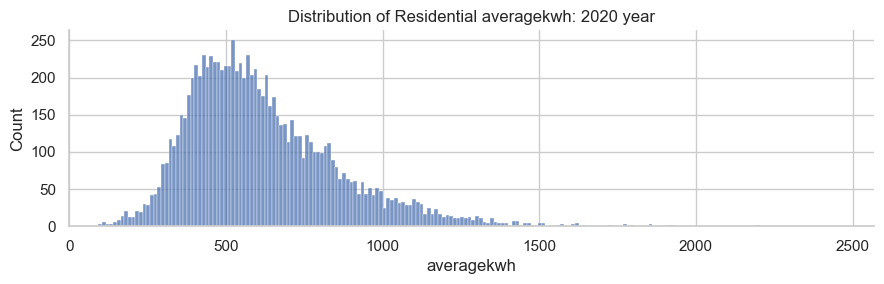

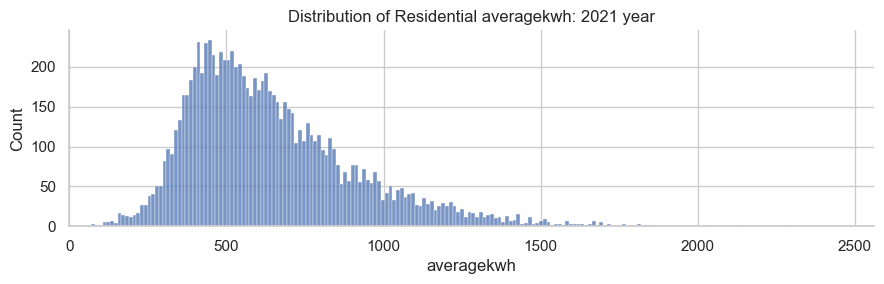

In [43]:
viz('Elec- Residential','averagekwh')
# all years excedpt 2016 & 2017 look quite normally distributed with some skewness

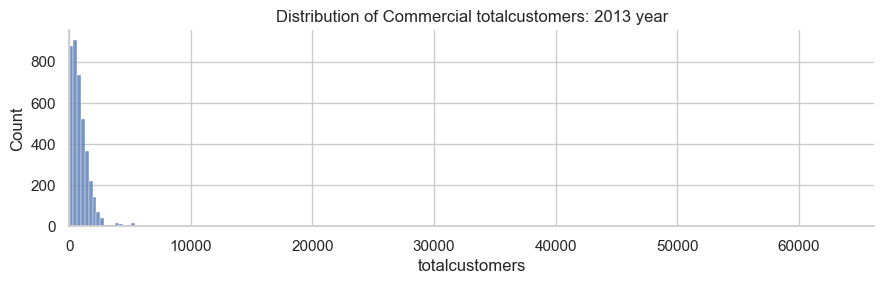

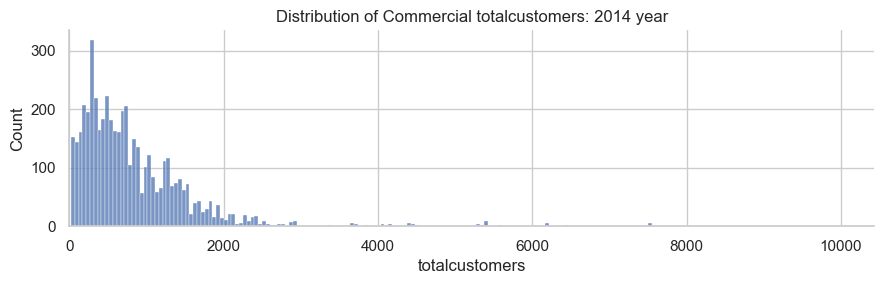

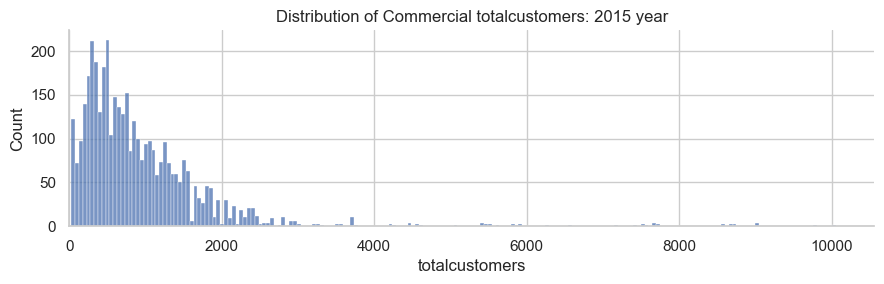

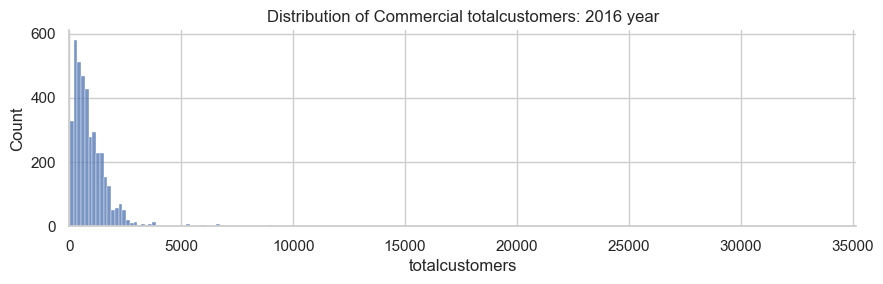

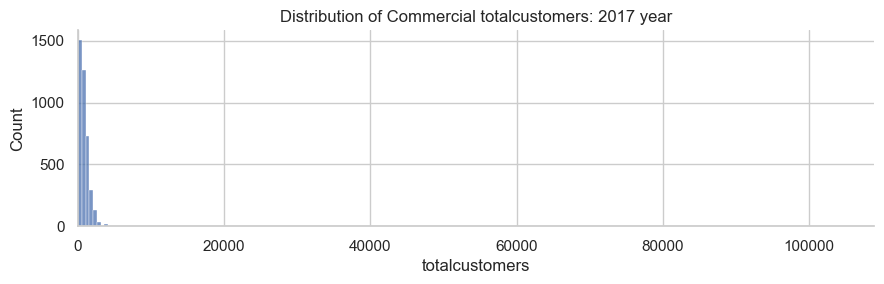

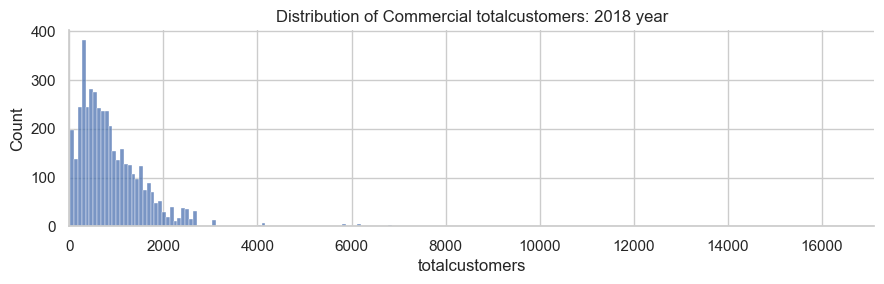

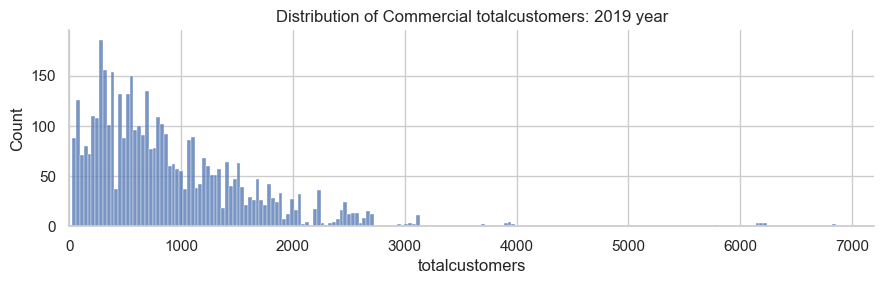

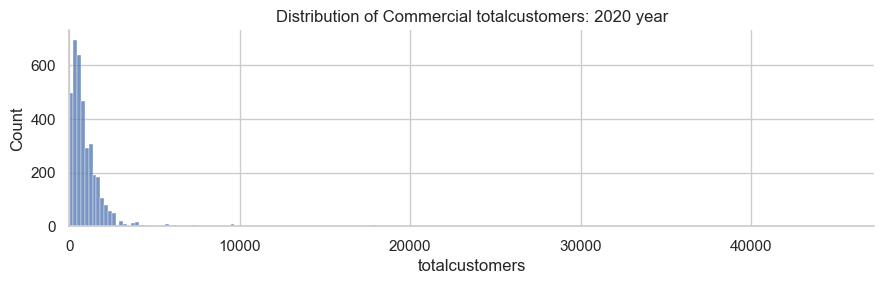

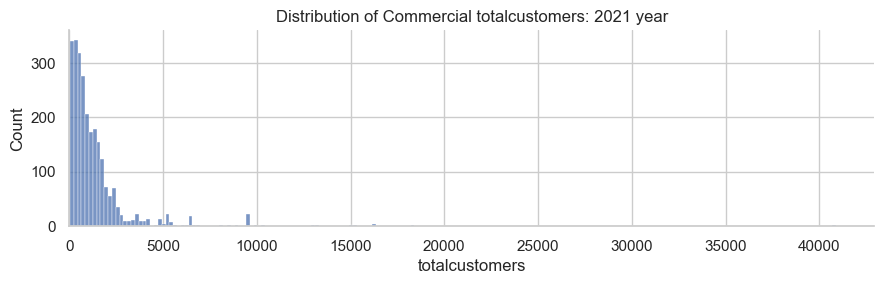

In [81]:
viz('Elec- Commercial','totalcustomers')

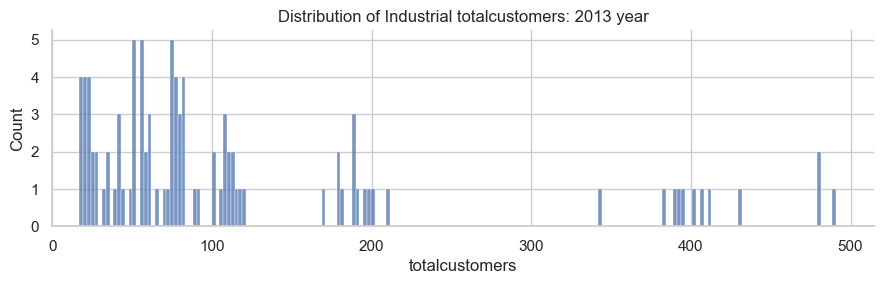

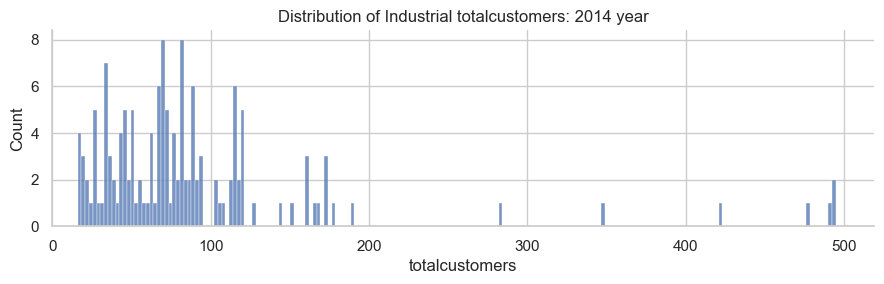

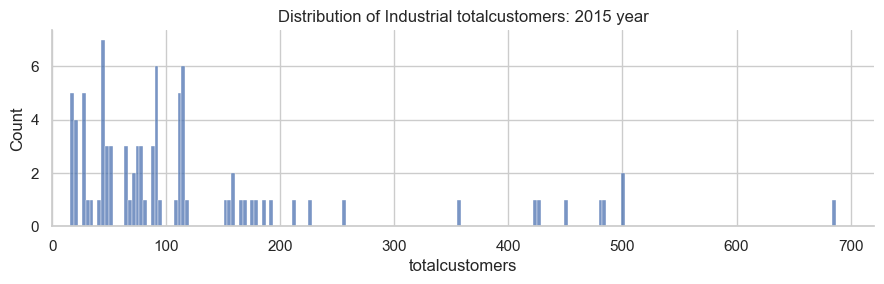

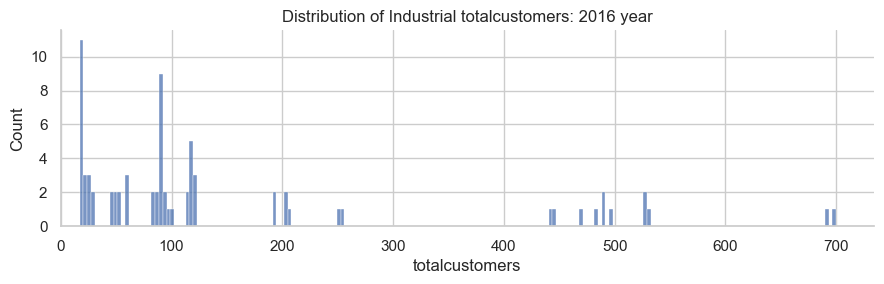

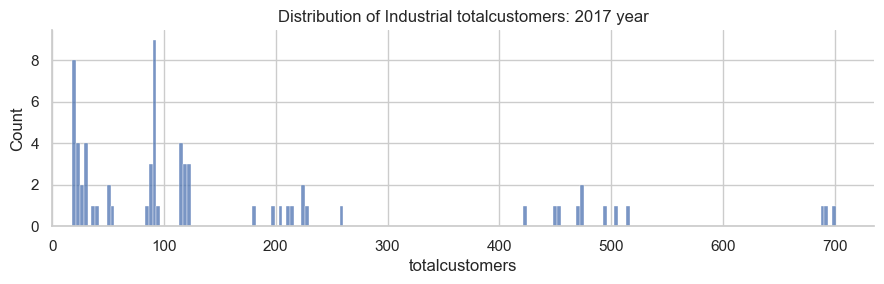

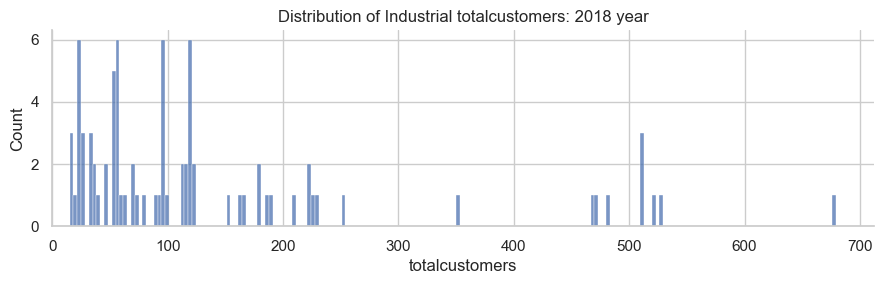

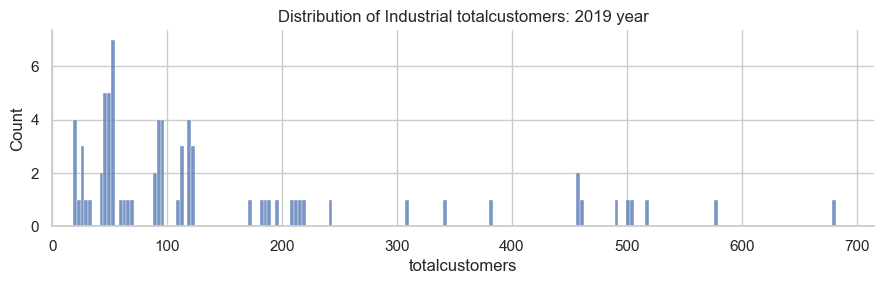

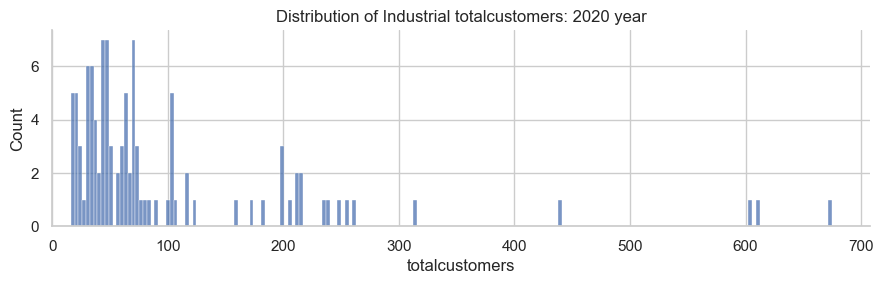

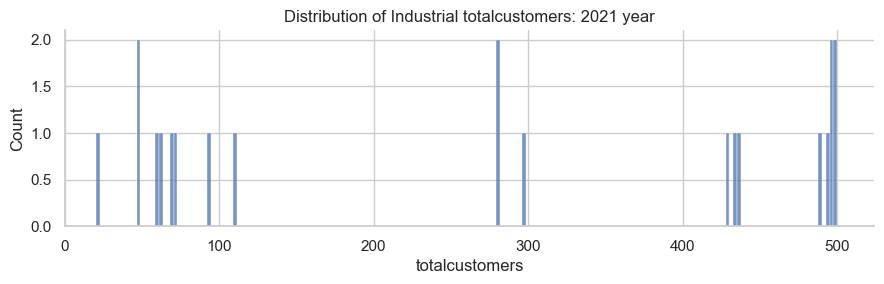

In [44]:
viz('Elec- Industrial','totalcustomers')

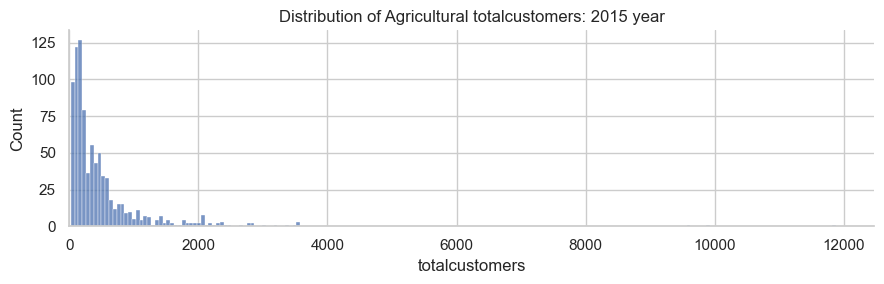

In [45]:
viz('Elec- Agricultural','totalcustomers', year=2015)

## Monthly and Yearly Trends Analysis

Lets explore if there is any seasonality in energy consumption by plotting consumption both over the years and over the months i.e. exploring time-series trends. Since Industrial clients consume much  more energy than all other groups i'll plot them separetly to allow us to see the time-series trens better.


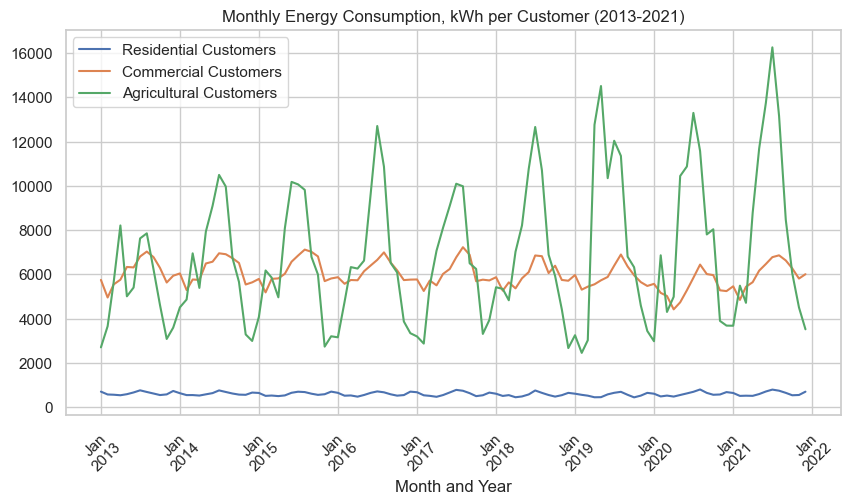

In [46]:
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

grouped_data = df_years.groupby(['customerclass', 'year', 'month']).agg({'averagekwh': 'median'})
grouped_data = grouped_data.reset_index()

customer_classes = ['Elec- Residential', 'Elec- Commercial', 'Elec- Agricultural']
customer_class_labels = ['Residential Customers', 'Commercial Customers', 'Agricultural Customers']

fig, ax = plt.subplots(figsize=(10, 5))

for i, customer_class in enumerate(customer_classes):
    data = grouped_data[grouped_data['customerclass'] == customer_class].copy()
    data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))
    data = data.sort_values('date')
    ax.plot(data['date'], data['averagekwh'], label=customer_class_labels[i])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.tick_params(axis='x', rotation=45)

ax.set_xlabel("Month and Year")
ax.set_title("Monthly Energy Consumption, kWh per Customer (2013-2021)")
ax.legend()
plt.show()

It looks like the consumprion peaks in the middle of the year every year. 

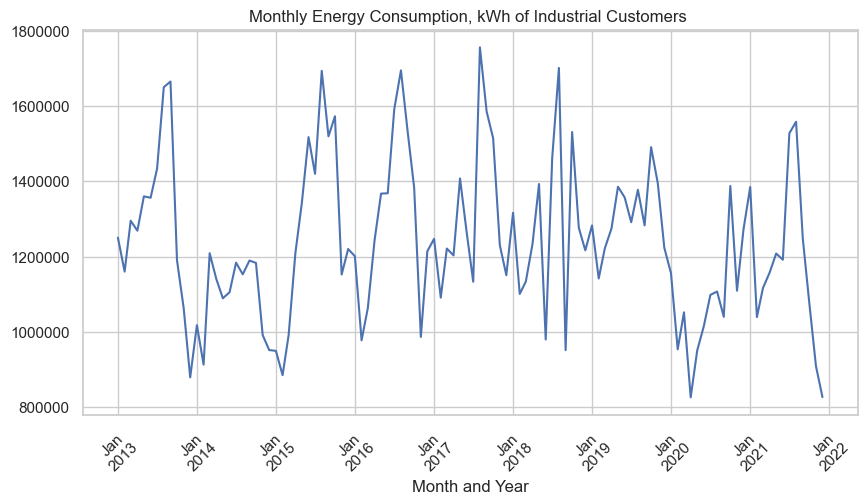

In [47]:
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

grouped_data = df_years.groupby(['customerclass', 'year', 'month']).agg({'averagekwh': 'median'})
grouped_data = grouped_data.reset_index()

customer_classes = ['Elec- Industrial']
customer_class_labels = ['Industrial Customers']

fig, ax = plt.subplots(figsize=(10, 5))

for i, customer_class in enumerate(customer_classes):
    data = grouped_data[grouped_data['customerclass'] == customer_class].copy()
    data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))
    data = data.sort_values('date')
    ax.plot(data['date'], data['averagekwh'], label=customer_class_labels[i])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.tick_params(axis='x', rotation=45)

ax.set_xlabel("Month and Year")
ax.set_title("Monthly Energy Consumption, kWh of Industrial Customers ")
ax.ticklabel_format(style='plain', axis='y')
plt.show()

Energy consumption of industrial clients follow similar pattern namely it peaks in summer months.

We could also check consumption trends over months averaged across all years.

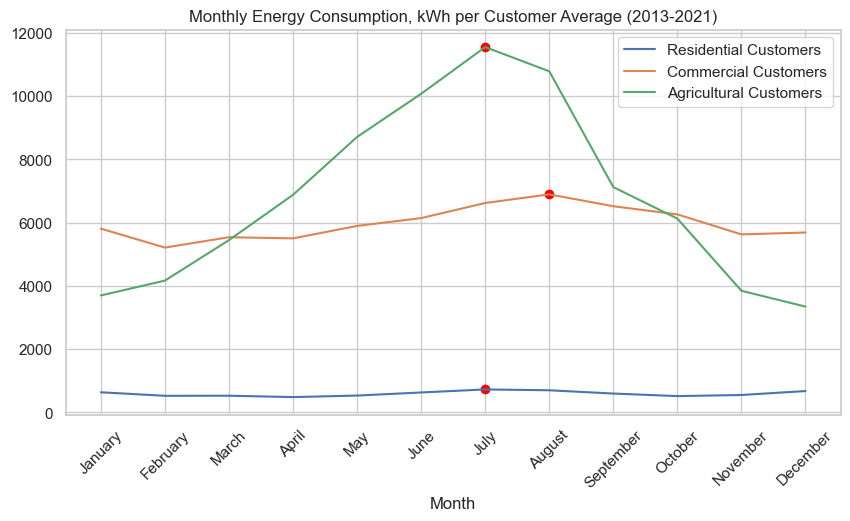

In [48]:
import calendar

grouped_data = df_years.groupby(['customerclass', 'month']).agg({'averagekwh': 'median'})
# I use median as it's more robust to outliers as compared to average
grouped_data = grouped_data.reset_index()

# use all customer classes but industrial for which the consumption is very high and which we will plot separately
customer_classes = ['Elec- Residential','Elec- Commercial','Elec- Agricultural']
customer_class_labels = ['Residential Customers', 'Commercial Customers', 'Agricultural Customers']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate over each unique customer class and plot a line
for i,customer_class in enumerate(customer_classes):
    # Select data for the current customer class
    data = grouped_data[grouped_data['customerclass'] == customer_class]
    
    # Find the maximum average consumption (averagejwh) point in the data for the current customer class
    highest_point = data[data['averagekwh'] == data['averagekwh'].max()]
    
    # Plot the line for the current customer class
    ax.plot(data['month'], data['averagekwh'], label=customer_class_labels[i])
    
    # Plot a marker at the highest point
    ax.scatter(highest_point['month'], highest_point['averagekwh'], marker='o', color='red')
    
    # Customize x-axis labels with month names
    ax.set_xticks(data['month'])
    ax.set_xticklabels([calendar.month_name[m] for m in data['month']], rotation=45)

# Customize the plot labels and title
ax.set_xlabel("Month")
#ax.set_ylabel("Median of Average Kilowatt per hour energy consumption")
ax.set_title("Monthly Energy Consumption, kWh per Customer Average (2013-2021)")
ax.legend()
plt.show()
# looks like summer months - July & August are peak months 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


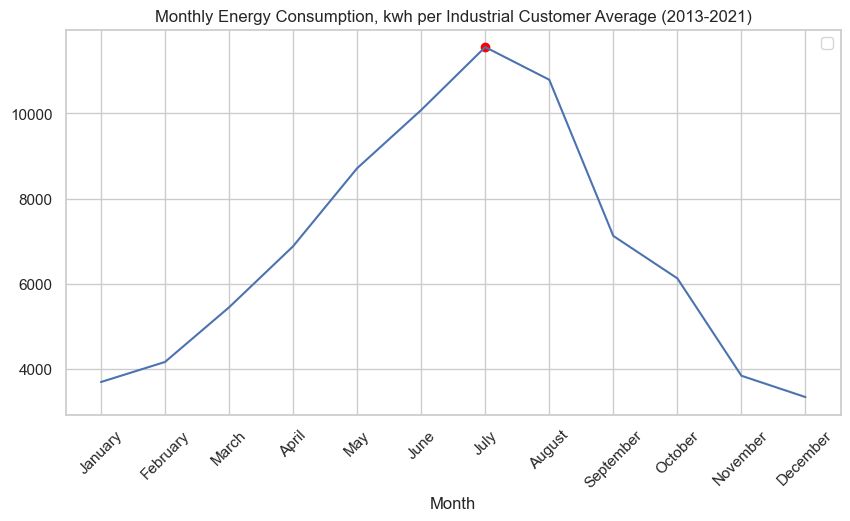

In [49]:
# plotting industrial customers separately as their consumption is much bigger 

grouped_data = df_years.groupby(['customerclass', 'month']).agg({'averagekwh': 'median'})
# I use median as it's more robust to outliers as compared to average
grouped_data = grouped_data.reset_index()

# use all customer classes but industrial for which the consumption is very high and which we will plot separately
customer_classes = ['Elec- Industrial']
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))
# Select data for the current customer class
data = grouped_data[grouped_data['customerclass'] == customer_class]
# Find the maximum average consumption (averagejwh) point 
highest_point = data[data['averagekwh'] == data['averagekwh'].max()]
ax.plot(data['month'], data['averagekwh'])
   
# Plot a marker at the highest point
ax.scatter(highest_point['month'], highest_point['averagekwh'], marker='o', color='red')
    
# Customize x-axis labels with month names
ax.set_xticks(data['month'])
ax.set_xticklabels([calendar.month_name[m] for m in data['month']], rotation=45)

# Customize the plot labels and title
ax.set_xlabel("Month")
#ax.set_ylabel("Median of Average Kilowatt per hour energy consumption")
ax.set_title("Monthly Energy Consumption, kwh per Industrial Customer Average (2013-2021)")
ax.ticklabel_format(style='plain', axis='y')

ax.legend()
plt.show()
# July is a peak month for industrial customers

All of the plots above suggest the seasonality trends.

# Testing Hypotheses

From our data exploration we saw the following trends
- All types of clients consume more averagekwh during summer months (Jun-Aug) than the rest of the year
- Industrial clients consume way more energy than all other clients

Let's try to test these tentative hypotheses

In [50]:
df_years[(df_years['customerclass']!="Elec- Industrial")].groupby('customerclass').averagekwh.describe()
# if we look briefly at the stats we see that the mean of averagekwh is the lowest for Residential clients

,count,mean,std,min,25%,50%,75%,max
customerclass,,,,,,,,
Elec- Agricultural,7521.0,15069.069805,20498.356168,174.0,3145.0,7592.0,16881.0,179410.0
Elec- Commercial,35755.0,7329.853559,6127.363670,329.0,4124.0,5944.0,8641.0,87707.0
Elec- Residential,84016.0,616.011843,593.163921,11.0,442.0,568.0,736.0,137298.0


In [51]:
df_years[(df_years['customerclass']=="Elec- Industrial")].groupby('customerclass').averagekwh.describe()
# if we look briefly at the stats we see that the mean of averagekwh is the highest for Industrial clients

,count,mean,std,min,25%,50%,75%,max
customerclass,,,,,,,,
Elec- Industrial,757.0,1.211876e+06,387261.49915,343851.0,910046.0,1183982.0,1558600.0,2371711.0


Let's formulate our hypotheses about 
- **seasonality** 
- **consumption volume**

**Seasonality**

-**$H_{null}$** : The average energy consumption (averagekwh) during summer months is equal to the mean energy consumption during the rest of the year.

-**$H_{alternative}$** : The average energy consumption during summer months (averagekwh) is different from the mean energy consumption during the rest of the year.

- Let's use standard **0.05** as a significance level as the threshold for rejecting the null hypothesis. 
- We'll test our seasonality hypothesis for each type of customer

**Consumption volume**

-**$H_{null}$** : The average energy consumption of residential clients is not significantly lower than the average energy consumption of all other customers.

-**$H_{alternative}$** : The average energy consumption of residential clients is significantly lower than the average energy consumption of all other customers.

**H0**: $μ_{residential}$ = $μ_{other}$

**HA**: $μ_{residential}$ < $μ_{other}$

- Let's use standard **0.05** as a significance level as the threshold for rejecting the null hypothesis. 


## Seasonality Hypothesis Test

In order to undestand what type of tests we can use for the seasonality hypothesis we need to look at the data distribution. Hence let's see how averagekwh is distributed over the years and in any particular year

In [52]:
from scipy import stats
from scipy.stats import normaltest

Let's use normal test from scipy library to check if the averagekwh is normally distributted across years ( which is quite unlikely) and also if the averagekwh is normally distributed within any particular year. This test uses  D'Agostino and Pearson's test of normality and if we get  a p-value less than 0.05 it means that we can reject the null hypothesis that the data is normally distributed

In [53]:
# we first aggregate data over all zipcodes 
grouped_data = df_years.groupby(['customerclass', 'year', 'month']).agg({'averagekwh': 'median'})
grouped_data = grouped_data.reset_index()
# then we focus on the distribution of Residential clients consumption first
summer_consumption=grouped_data[(grouped_data['month']>=6) & (grouped_data['month']<=8) & (grouped_data['customerclass'].str.contains('Residential')) ]['averagekwh']

In [54]:
summer_consumption

329    657.0
330    752.5
331    678.5
341    627.0
342    749.0
343    678.0
353    642.0
354    690.0
355    674.0
365    639.0
366    704.0
367    663.0
377    656.0
378    773.0
379    733.0
389    567.0
390    746.0
391    638.0
401    570.0
402    640.5
403    685.0
413    613.5
414    686.0
415    791.5
425    700.0
426    785.5
427    736.0
Name: averagekwh, dtype: float64

In [55]:
rest_year=grouped_data[((grouped_data['month']<6) | (grouped_data['month']>8)) &(grouped_data['customerclass'].str.contains('Residential'))]['averagekwh']

In [56]:
rest_year

324    694.0
325    565.0
326    554.0
327    530.0
328    578.0
       ...  
424    584.0
428    638.5
429    529.5
430    542.0
431    691.5
Name: averagekwh, Length: 81, dtype: float64

In [57]:
k2, p = normaltest(summer_consumption.values)
alpha = 0.05  # significance level
if p < alpha:
    print("Summer consumption is not normally distributed.")
else:
    print("Summer consumption follows a normal distribution.")

Summer consumption follows a normal distribution.


In [58]:
k2, p = normaltest(rest_year.values)
alpha = 0.05  # significance level
if p < alpha:
    print("The rest of the year consumption is not normally distributed.")
else:
    print("The rest of the year consumption follows a normal distribution.")

The rest of the year consumption follows a normal distribution.


### T-test of group means

We see that for residential clients their summer and non summer consumption over the years are not normally distributed. Hence we could use ttest of means to test our hypothesis. 

In [59]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(summer_consumption, rest_year) # Perform the independent t-test
# Print the results
print('T-Statistic:', t_statistic)
if p_value<0.05:
    print('P-Value:', p_value, '.Reject null hypothesis. The average energy consumption during summer months (averagekwh) is different from the mean energy consumption during the rest of the year.')
else:
    print('P-Value:', p_value, '.Fail to reject null hypothesis. The average energy consumption (averagekwh) during summer months is equal to the mean energy consumption during the rest of the year.')


T-Statistic: 8.685543368760632
P-Value: 5.0336088763403594e-14 .Reject null hypothesis. The average energy consumption during summer months (averagekwh) is different from the mean energy consumption during the rest of the year.


Now lets further examine the direction of the differences i.e. whether the summer consumption is bigger or smaller than the rest of the year consumption

In [60]:
t_statistic, p_value = ttest_ind(summer_consumption, rest_year, alternative='greater')
# Check if summer consumption is greater than the rest of the year
if p_value < 0.05:
    print("There is a significant difference. Summer consumption is greater than the rest of the year.")
else:
    print("There is no significant difference. Summer consumption is not greater than the rest of the year.")

There is a significant difference. Summer consumption is greater than the rest of the year.


In [66]:
print("N of points for summer sample:", len(summer_consumption),".","N of points for the rest of the year sample", len(rest_year))

N of points for summer sample: 27 . N of points for the rest of the year sample 81


### Permutation test

However we see that the data size for summer months is small (27 points) and it's not balanced with the number of points in the rest of the year (81 points). Hence, results of ttest may be less reliable. Insted of ttest we can do permutation test. It does not require any assumptions about the sampling distribution. 

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def permutation_test(data1, data2, num_permutations, plot=True):
    observed_diff = np.mean(data1) - np.mean(data2)    # Compute the observed difference between means
    combined_data = np.concatenate([data1, data2]) # Combine the data from both groups
    permuted_diffs = np.zeros(num_permutations) # Initialize an array to store the permuted differences
    # Perform the permutation test
    for i in range(num_permutations):
        # Randomly permute the combined data
        permuted_data = np.random.permutation(combined_data)

        # Split the permuted data into two groups
        permuted_data1 = permuted_data[:len(data1)]
        permuted_data2 = permuted_data[len(data1):]

        # Compute the difference between means for the permuted data
        permuted_diffs[i] = np.mean(permuted_data1) - np.mean(permuted_data2)

    # Compute the p-value by counting the number of permuted differences
    # that are as extreme as the observed difference
    p_value = np.sum(np.abs(permuted_diffs) >= np.abs(observed_diff)) / num_permutations

    # Plot the permuted differences
    if plot:
        plt.hist(permuted_diffs, bins='auto', alpha=0.7)
        plt.axvline(x=observed_diff, color='r', label='Observed Difference')
        plt.xlabel('Difference between Means')
        plt.ylabel('Frequency')
        plt.legend()
        plt.title('Permutation Test')
        plt.show()
    print(f"P value is {p_value}")

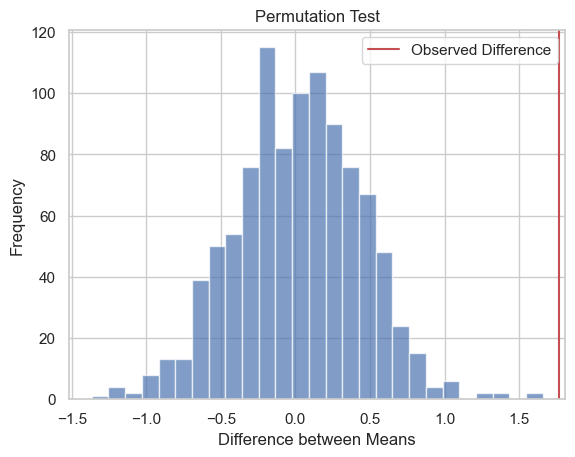

P value is 0.0


In [116]:
permutation_test(summer_consumption, rest_year,1000)